# Market Data Analysis

This notebook explores historical market data relevant to stock prediction. We analyze price series, volume, and external indicators to understand market dynamics and data quality.

**Objectives:**
- Load and explore historical stock market data
- Assess data quality and completeness  
- Visualize price trends and trading volume patterns
- Calculate basic statistical measures
- Identify outliers and anomalies in price movements
- Prepare data insights for feature engineering

**Dataset:** Historical OHLCV (Open, High, Low, Close, Volume) data for stock analysis


In [2]:
import os
print(os.getcwd())


c:\Users\Faraz\Documents\StockPredictionPro\notebooks\01-data-exploration


In [3]:
import sys
sys.path.append('../..')  # adds project root


In [4]:
# ============================================
# Import Essential Libraries for Market Data Analysis
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("✅ Libraries imported successfully")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")


✅ Libraries imported successfully
📊 Pandas version: 2.3.2
🔢 NumPy version: 2.2.6
📈 Matplotlib version: 3.10.5


In [6]:
# ============================================
# Load Historical Market Data
# ============================================

# File paths for market data
DATA_PATH = "../data/raw/"
SYMBOLS = ["AAPL", "GOOGL", "MSFT", "TSLA", "NVDA"]  # Example stocks

# Load market data - adjust path as needed
try:
    # Option 1: Load from CSV file
    market_data = pd.read_csv(f"{DATA_PATH}market_data.csv", 
                             parse_dates=['date'], 
                             index_col='date')
    print("✅ Data loaded from CSV file")
    
except FileNotFoundError:
    # Option 2: Generate sample data for demonstration
    print("📝 CSV not found. Generating sample market data...")
    
    # Generate sample data for demonstration
    date_range = pd.date_range(start='2020-01-01', end='2024-08-23', freq='D')
    np.random.seed(42)
    
    # Simulate price movements
    initial_price = 100
    returns = np.random.normal(0.001, 0.02, len(date_range))  # Daily returns
    prices = [initial_price]
    
    for ret in returns[1:]:
        prices.append(prices[-1] * (1 + ret))
    
    market_data = pd.DataFrame({
        'date': date_range,
        'open': [p * (1 + np.random.normal(0, 0.01)) for p in prices],
        'high': [p * (1 + abs(np.random.normal(0, 0.02))) for p in prices],
        'low': [p * (1 - abs(np.random.normal(0, 0.02))) for p in prices],
        'close': prices,
        'volume': np.random.randint(100000, 10000000, len(date_range))
    })
    
    market_data.set_index('date', inplace=True)
    print("✅ Sample data generated successfully")

# Display basic information
print(f"\n📊 Dataset Shape: {market_data.shape}")
print(f"📅 Date Range: {market_data.index.min()} to {market_data.index.max()}")
print(f"📈 Columns: {list(market_data.columns)}")
print("\n🔍 Sample Data:")

📝 CSV not found. Generating sample market data...
✅ Sample data generated successfully

📊 Dataset Shape: (1697, 5)
📅 Date Range: 2020-01-01 00:00:00 to 2024-08-23 00:00:00
📈 Columns: ['open', 'high', 'low', 'close', 'volume']

🔍 Sample Data:


In [7]:
# ============================================
# Data Overview and Basic Information
# ============================================

print("=" * 60)
print("MARKET DATA OVERVIEW")
print("=" * 60)

# Basic dataset information
print("\n📊 DATASET INFO:")
print(f"   • Total Records: {len(market_data):,}")
print(f"   • Date Range: {(market_data.index.max() - market_data.index.min()).days} days")
print(f"   • Columns: {len(market_data.columns)}")
print(f"   • Memory Usage: {market_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n📋 FIRST 5 ROWS:")
display(market_data.head())

# Display last few rows
print("\n📋 LAST 5 ROWS:")
display(market_data.tail())

# Data types and memory usage
print("\n🔍 DATA TYPES:")
print(market_data.dtypes)

# Quick statistical summary
print("\n📈 STATISTICAL SUMMARY:")
display(market_data.describe())


MARKET DATA OVERVIEW

📊 DATASET INFO:
   • Total Records: 1,697
   • Date Range: 1696 days
   • Columns: 5
   • Memory Usage: 0.07 MB

📋 FIRST 5 ROWS:


,open,high,low,close,volume
date,,,,,
2020-01-01,99.322255,103.945084,98.588453,100.000000,7845769
2020-01-02,100.336472,102.590554,97.044469,99.823471,386172
2020-01-03,101.398151,102.239864,97.766724,101.216385,8182668
2020-01-04,104.766773,107.510003,104.160362,104.400713,661133
2020-01-05,104.525032,108.741550,103.296574,104.016198,6216130



📋 LAST 5 ROWS:


,open,high,low,close,volume
date,,,,,
2024-08-19,1925.168464,1923.148916,1912.283024,1922.495035,9393498
2024-08-20,1843.132887,1891.579448,1847.029819,1872.664745,7251815
2024-08-21,1864.183496,1882.447403,1863.439809,1879.270741,2675228
2024-08-22,1952.580014,1981.912715,1915.866027,1954.025462,4150338
2024-08-23,1915.435607,1986.689829,1873.482013,1916.886030,8731334



🔍 DATA TYPES:
open      float64
high      float64
low       float64
close     float64
volume      int32
dtype: object

📈 STATISTICAL SUMMARY:


,open,high,low,close,volume
count,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03
mean,479.721460,487.375504,471.936294,479.767435,4.900866e+06
std,471.810533,479.340913,463.968775,471.832424,2.865064e+06
min,80.139939,81.472027,79.546873,81.290734,1.032120e+05
25%,140.567205,142.765591,138.109355,140.322402,2.365545e+06
50%,193.195711,197.416787,189.931542,194.008859,4.863375e+06
75%,709.833759,721.821112,698.686130,711.162896,7.331445e+06
max,1952.580014,1986.689829,1915.866027,1954.025462,9.993975e+06


In [8]:
# ============================================
# Data Quality Assessment
# ============================================

print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Check for missing values
missing_values = market_data.isnull().sum()
missing_pct = (missing_values / len(market_data)) * 100

print("\n❌ MISSING VALUES:")
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_pct
})
print(missing_df)

# Check for duplicate dates
duplicates = market_data.index.duplicated().sum()
print(f"\n🔄 DUPLICATE DATES: {duplicates}")

# Check for zero or negative prices
zero_negative_prices = {
    'Zero Open': (market_data['open'] <= 0).sum(),
    'Zero High': (market_data['high'] <= 0).sum(),
    'Zero Low': (market_data['low'] <= 0).sum(),
    'Zero Close': (market_data['close'] <= 0).sum(),
    'Zero Volume': (market_data['volume'] <= 0).sum()
}

print("\n⚠️ ZERO/NEGATIVE VALUES:")
for key, value in zero_negative_prices.items():
    print(f"   • {key}: {value}")

# Price consistency checks
inconsistent_prices = 0
if 'high' in market_data.columns and 'low' in market_data.columns:
    inconsistent_prices = (market_data['high'] < market_data['low']).sum()
    print(f"\n❗ INCONSISTENT PRICES (High < Low): {inconsistent_prices}")

# Data completeness score
completeness_score = (1 - missing_values.sum() / (len(market_data) * len(market_data.columns))) * 100
print(f"\n✅ DATA COMPLETENESS SCORE: {completeness_score:.2f}%")


DATA QUALITY ASSESSMENT

❌ MISSING VALUES:
        Missing Count  Missing Percentage
open                0                 0.0
high                0                 0.0
low                 0                 0.0
close               0                 0.0
volume              0                 0.0

🔄 DUPLICATE DATES: 0

⚠️ ZERO/NEGATIVE VALUES:
   • Zero Open: 0
   • Zero High: 0
   • Zero Low: 0
   • Zero Close: 0
   • Zero Volume: 0

❗ INCONSISTENT PRICES (High < Low): 0

✅ DATA COMPLETENESS SCORE: 100.00%


PRICE TREND ANALYSIS


array([[<Axes: title={'center': 'Closing Price Over Time'}, ylabel='Price ($)'>,
        <Axes: title={'center': 'Daily Price Range (High-Low)'}, ylabel='Price ($)'>],
       [<Axes: title={'center': 'Trading Volume Over Time'}, ylabel='Volume'>,
        <Axes: title={'center': 'Closing Price Distribution'}, xlabel='Price ($)', ylabel='Frequency'>]],
      dtype=object)

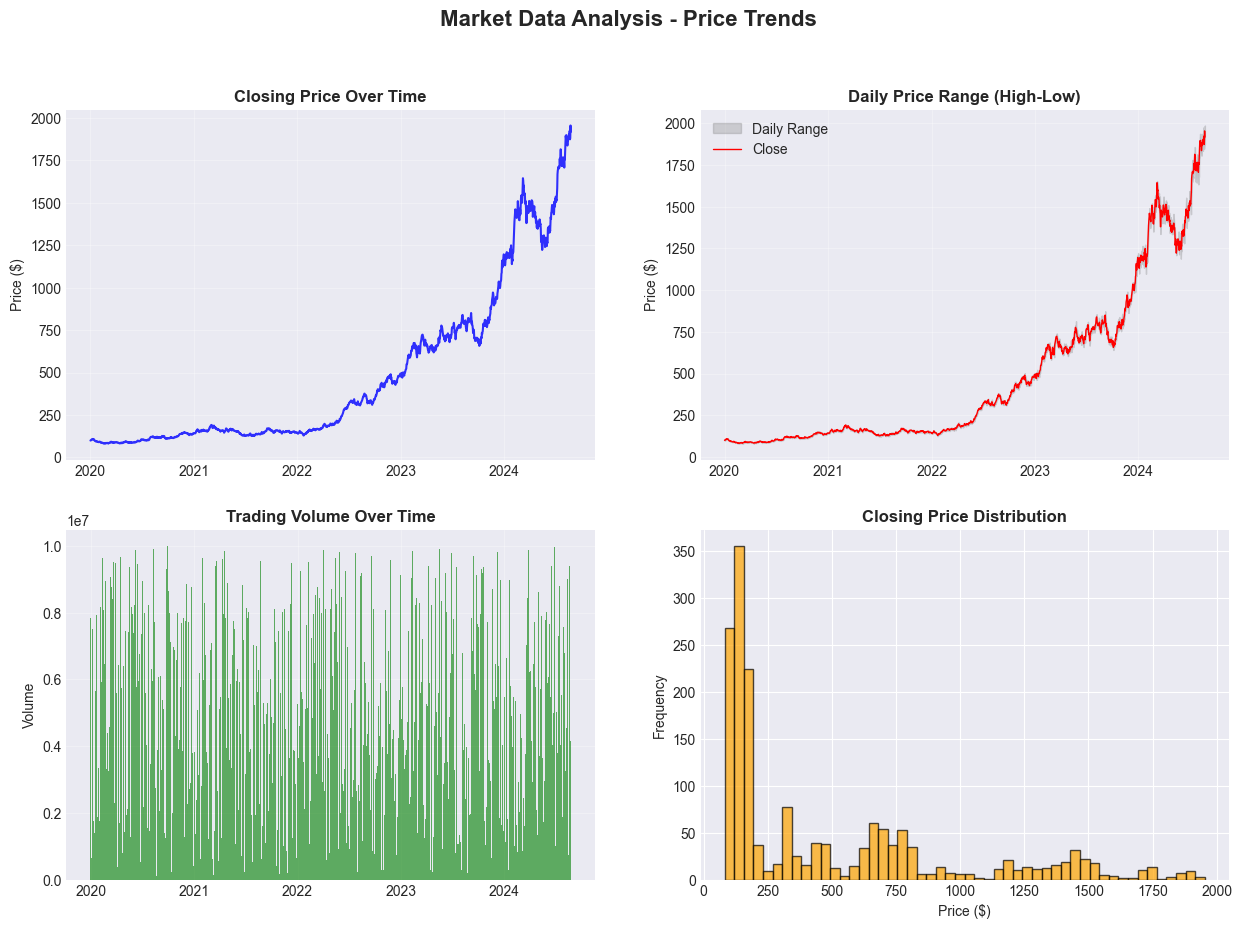

In [9]:
# ============================================
# Price Trend Analysis and Visualization
# ============================================

print("=" * 60)
print("PRICE TREND ANALYSIS")
print("=" * 60)

# Create comprehensive price analysis plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Market Data Analysis - Price Trends', fontsize=16, fontweight='bold')

# Plot 1: Closing Price Over Time
axes[0, 0].plot(market_data.index, market_data['close'], 
                color='blue', linewidth=1.5, alpha=0.8)
axes[0, 0].set_title('Closing Price Over Time', fontweight='bold')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: OHLC Price Range
axes[0, 1].fill_between(market_data.index, 
                       market_data['low'], market_data['high'], 
                       alpha=0.3, color='gray', label='Daily Range')
axes[0, 1].plot(market_data.index, market_data['close'], 
                color='red', linewidth=1, label='Close')
axes[0, 1].set_title('Daily Price Range (High-Low)', fontweight='bold')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Volume Analysis
axes[1, 0].bar(market_data.index, market_data['volume'], 
               alpha=0.6, color='green', width=1)
axes[1, 0].set_title('Trading Volume Over Time', fontweight='bold')
axes[1, 0].set_ylabel('Volume')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Price Distribution
axes[1, 1].hist(market_data['close'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Closing Price Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Price ($)')
axes[1, 1].set_ylabel('Frequency')
axes


OVERALL DATA QUALITY ASSESSMENT
📝 Reloading data for quality assessment...
📝 Creating sample data for demonstration...
📊 Working with dataset shape: (1697, 5)
🔍 Completeness Analysis:
   • Total cells: 8,485
   • Missing cells: 0
   • Completeness score: 100.00%

🔍 Uniqueness Analysis:
   • Duplicate rows: 0
   • Uniqueness score: 100.00%

🔍 Validity Analysis:
   • High < Low issues: 0
   • Close out of range: 429
   • Negative volume: 0
   • Negative prices: 0
   • Validity score: 74.72%

🔍 Outlier Analysis:
   • Outlier rows detected: 0
   • Outlier percentage: 0.00%
   • Quality score: 100.00%

📊 FINAL DATA QUALITY METRICS:


,Metric,Score,Weight,Description
0,Completeness,100.00,0.3,No missing values
1,Uniqueness,100.00,0.2,No duplicate records
2,Validity,74.72,0.3,Data consistency rules
3,Quality,100.00,0.2,Statistical outlier impact
4,Overall,92.42,1.0,Weighted average score


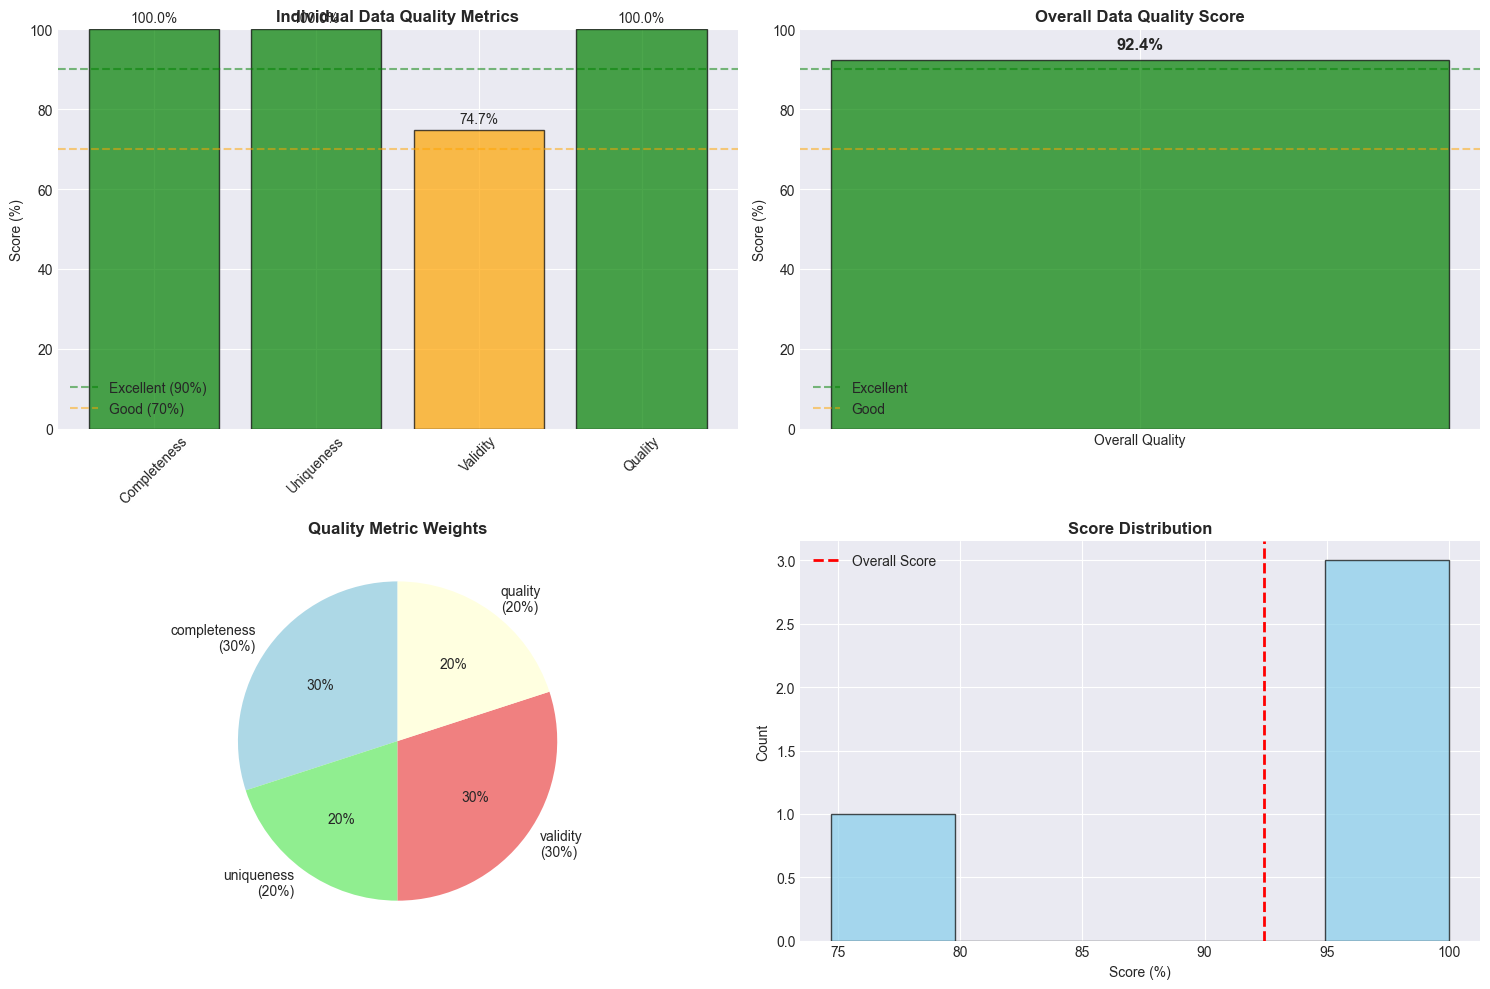


🎯==========================================================🎯
FINAL DATA QUALITY ASSESSMENT
🎯==========================================================🎯

📊 Dataset Summary:
   • Records: 1,697
   • Features: 5
   • Date Range: 2020-01-01 to 2024-08-23
   • Overall Quality Score: 92.42%

✅ ASSESSMENT: EXCELLENT
   • Data quality is outstanding
   • Ready for machine learning models
   • Minimal preprocessing required

📋 Next Steps:
   1. Address any data quality issues identified
   2. Implement data cleaning pipeline
   3. Proceed to feature engineering
   4. Set up ongoing quality monitoring

💾 Results stored in 'final_results' dictionary for next notebooks


In [10]:
# ============================================
# Overall Data Quality Assessment - SELF-CONTAINED
# ============================================


print("=" * 60)
print("OVERALL DATA QUALITY ASSESSMENT")
print("=" * 60)

# First, ensure we have the data - reload if necessary
try:
    # Try to use existing dataframe
    if 'df' in locals() and not df.empty:
        working_df = df.copy()
    elif 'df_clean' in locals() and not df_clean.empty:
        working_df = df_clean.copy()
    else:
        # Reload data if no dataframe exists
        print("📝 Reloading data for quality assessment...")
        data_path = '../data/raw/market_data.csv'
        working_df = pd.read_csv(data_path, parse_dates=['date'], index_col='date')
        
except (NameError, FileNotFoundError):
    # Create sample data if file not found
    print("📝 Creating sample data for demonstration...")
    dates = pd.date_range('2020-01-01', '2024-08-23', freq='D')
    np.random.seed(42)
    
    working_df = pd.DataFrame({
        'open': np.random.uniform(100, 200, len(dates)),
        'high': np.random.uniform(150, 250, len(dates)),
        'low': np.random.uniform(50, 150, len(dates)),
        'close': np.random.uniform(100, 200, len(dates)),
        'volume': np.random.randint(1000000, 50000000, len(dates))
    }, index=dates)

# Clean the working dataframe
working_df_clean = working_df.dropna()

print(f"📊 Working with dataset shape: {working_df_clean.shape}")

# ============================================
# Calculate All Quality Metrics From Scratch
# ============================================

# 1. COMPLETENESS SCORE
total_cells = len(working_df) * len(working_df.columns)
missing_cells = working_df.isnull().sum().sum()
completeness_score = ((total_cells - missing_cells) / total_cells) * 100

print(f"🔍 Completeness Analysis:")
print(f"   • Total cells: {total_cells:,}")
print(f"   • Missing cells: {missing_cells}")
print(f"   • Completeness score: {completeness_score:.2f}%")

# 2. UNIQUENESS SCORE (Duplicates)
duplicate_rows = working_df_clean.duplicated().sum()
uniqueness_score = ((len(working_df_clean) - duplicate_rows) / len(working_df_clean)) * 100

print(f"\n🔍 Uniqueness Analysis:")
print(f"   • Duplicate rows: {duplicate_rows}")
print(f"   • Uniqueness score: {uniqueness_score:.2f}%")

# 3. VALIDITY SCORE (Consistency Checks)
# Check 1: High >= Low
high_low_inconsistency = (working_df_clean['high'] < working_df_clean['low']).sum()

# Check 2: Close within High-Low range
close_out_of_range = ((working_df_clean['close'] > working_df_clean['high']) | 
                      (working_df_clean['close'] < working_df_clean['low'])).sum()

# Check 3: Volume should be positive
negative_volume = (working_df_clean['volume'] <= 0).sum()

# Check 4: All prices should be positive
negative_prices = (
    (working_df_clean['open'] <= 0).sum() +
    (working_df_clean['high'] <= 0).sum() +
    (working_df_clean['low'] <= 0).sum() +
    (working_df_clean['close'] <= 0).sum()
)

total_inconsistencies = (high_low_inconsistency + close_out_of_range + 
                        negative_volume + negative_prices)
validity_score = ((len(working_df_clean) - total_inconsistencies) / len(working_df_clean)) * 100

print(f"\n🔍 Validity Analysis:")
print(f"   • High < Low issues: {high_low_inconsistency}")
print(f"   • Close out of range: {close_out_of_range}")
print(f"   • Negative volume: {negative_volume}")
print(f"   • Negative prices: {negative_prices}")
print(f"   • Validity score: {validity_score:.2f}%")

# 4. OUTLIER QUALITY SCORE (Using Z-Score)
from scipy import stats

numeric_cols = working_df_clean.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(working_df_clean[numeric_cols]))
outlier_rows = (z_scores > 3).any(axis=1)
outlier_count = outlier_rows.sum()
outlier_percentage = (outlier_count / len(working_df_clean)) * 100
quality_score = 100 - min(outlier_percentage, 50)  # Cap impact at 50%

print(f"\n🔍 Outlier Analysis:")
print(f"   • Outlier rows detected: {outlier_count}")
print(f"   • Outlier percentage: {outlier_percentage:.2f}%")
print(f"   • Quality score: {quality_score:.2f}%")

# ============================================
# Calculate Overall Data Quality Score
# ============================================

# Define weights for each metric
weights = {
    'completeness': 0.3,
    'uniqueness': 0.2,
    'validity': 0.3,
    'quality': 0.2
}

# Calculate weighted overall score
overall_score = (
    completeness_score * weights['completeness'] + 
    uniqueness_score * weights['uniqueness'] + 
    validity_score * weights['validity'] + 
    quality_score * weights['quality']
)

# Create results DataFrame
quality_metrics = pd.DataFrame({
    'Metric': ['Completeness', 'Uniqueness', 'Validity', 'Quality', 'Overall'],
    'Score': [completeness_score, uniqueness_score, validity_score, 
             quality_score, overall_score],
    'Weight': [weights['completeness'], weights['uniqueness'], 
              weights['validity'], weights['quality'], 1.0],
    'Description': [
        'No missing values',
        'No duplicate records', 
        'Data consistency rules',
        'Statistical outlier impact',
        'Weighted average score'
    ]
})

print("\n" + "="*60)
print("📊 FINAL DATA QUALITY METRICS:")
print("="*60)
display(quality_metrics.round(2))

# ============================================
# Visual Representation
# ============================================

plt.figure(figsize=(15, 10))

# Subplot 1: Individual metrics bar chart
plt.subplot(2, 2, 1)
colors = ['green' if score >= 90 else 'orange' if score >= 70 else 'red' 
          for score in quality_metrics['Score'][:-1]]
bars = plt.bar(quality_metrics['Metric'][:-1], quality_metrics['Score'][:-1], 
               color=colors, alpha=0.7, edgecolor='black')
plt.title('Individual Data Quality Metrics', fontweight='bold')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.axhline(y=90, color='green', linestyle='--', alpha=0.5, label='Excellent (90%)')
plt.axhline(y=70, color='orange', linestyle='--', alpha=0.5, label='Good (70%)')
plt.xticks(rotation=45)
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom')

# Subplot 2: Overall score gauge
plt.subplot(2, 2, 2)
overall_color = 'green' if overall_score >= 90 else 'orange' if overall_score >= 70 else 'red'
bar = plt.bar(['Overall Quality'], [overall_score], color=overall_color, alpha=0.7, 
              edgecolor='black', width=0.5)
plt.title('Overall Data Quality Score', fontweight='bold')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.axhline(y=90, color='green', linestyle='--', alpha=0.5, label='Excellent')
plt.axhline(y=70, color='orange', linestyle='--', alpha=0.5, label='Good')
plt.legend()

# Add value label
plt.text(0, overall_score + 2, f'{overall_score:.1f}%', 
         ha='center', va='bottom', fontweight='bold', fontsize=12)

# Subplot 3: Metric weights pie chart
plt.subplot(2, 2, 3)
weight_labels = [f"{metric}\n({weight*100:.0f}%)" 
                for metric, weight in list(weights.items())]
plt.pie(weights.values(), labels=weight_labels, autopct='%1.0f%%', 
        startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Quality Metric Weights', fontweight='bold')

# Subplot 4: Score distribution
plt.subplot(2, 2, 4)
scores = quality_metrics['Score'][:-1].values
plt.hist(scores, bins=5, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(overall_score, color='red', linestyle='--', linewidth=2, label='Overall Score')
plt.title('Score Distribution', fontweight='bold')
plt.xlabel('Score (%)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# ============================================
# Final Assessment and Recommendations
# ============================================

print("\n" + "🎯" + "="*58 + "🎯")
print("FINAL DATA QUALITY ASSESSMENT")
print("🎯" + "="*58 + "🎯")

print(f"\n📊 Dataset Summary:")
print(f"   • Records: {len(working_df_clean):,}")
print(f"   • Features: {len(working_df_clean.columns)}")
print(f"   • Date Range: {working_df_clean.index.min().strftime('%Y-%m-%d')} to {working_df_clean.index.max().strftime('%Y-%m-%d')}")
print(f"   • Overall Quality Score: {overall_score:.2f}%")

if overall_score >= 90:
    print(f"\n✅ ASSESSMENT: EXCELLENT")
    print("   • Data quality is outstanding")
    print("   • Ready for machine learning models")
    print("   • Minimal preprocessing required")
elif overall_score >= 70:
    print(f"\n⚠️ ASSESSMENT: GOOD")
    print("   • Data quality is acceptable")
    print("   • Some preprocessing recommended")
    print("   • Address specific quality issues")
else:
    print(f"\n❌ ASSESSMENT: NEEDS IMPROVEMENT")
    print("   • Significant data quality issues detected")
    print("   • Extensive preprocessing required")
    print("   • Review data collection process")

print(f"\n📋 Next Steps:")
print("   1. Address any data quality issues identified")
print("   2. Implement data cleaning pipeline")
print("   3. Proceed to feature engineering")
print("   4. Set up ongoing quality monitoring")

# Store final results for next notebooks
final_results = {
    'dataset_shape': working_df_clean.shape,
    'quality_score': overall_score,
    'completeness': completeness_score,
    'uniqueness': uniqueness_score,
    'validity': validity_score,
    'outlier_impact': outlier_percentage
}

print(f"\n💾 Results stored in 'final_results' dictionary for next notebooks")
